<a href="https://colab.research.google.com/github/wmazza-br/wmazza-br/blob/main/Job_08_Fortune_2000_in_English.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='blue' style='font-size: 30px;'>The beginning</font>
<hr style='border: 2px solid blue;'>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##<font color='blue' style='font-size: 30px;'>The case</font>
<hr style='border: 2px solid blue;'>

**Description**: Fortune 2000 Companies (2021)
List of top 2000 companies with their total sales, total profits, total assets, and total market value

Since 2003, Forbes’ Global 2000 list has measured the world’s largest public companies in terms of four equally weighted metrics: assets, market value, sales and profits. 

Last year’s edition offered a glimpse into the early economic implications of the Covid-19 pandemic. 

Now, we see the results over 12 months of market turmoil and unfathomable human loss.

**What I want**: Evaluate the data and extract interesting information, in addition to using statistical tools to find out if it is possible to use this sample of 2 thousand companies, as valid for other companies that someone wants to evaluate.

source: https://www.kaggle.com/shivamb/fortune-global-2000-companies-till-2021

##<font color='blue' style='font-size: 30px;'>Knowing the database</font>
<hr style='border: 2px solid blue;'>

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fortune_2000_in_2021.csv')

In [ ]:
dados

,Rank,Name,Country,Sales,Profit,Assets,Market Value
0,1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B
1,2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B
2,3,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B
3,4,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B"
...,...,...,...,...,...,...,...
1995,1996,JTEKT,Japan,$13.1 B,$-34.9 M,$12 B,$3.5 B
1996,1997,Insurance Australia Group,Australia,$5.4 B,$-212 M,$25 B,$9.3 B
1997,1997,Sumec Corporation,China,$13 B,$79.2 M,$7.1 B,$1.3 B
1998,1999,Gold Fields,South Africa,$3.9 B,$718.1 M,$7.5 B,$8.9 B


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          2000 non-null   int64 
 1   Name          2000 non-null   object
 2   Country       2000 non-null   object
 3   Sales         2000 non-null   object
 4   Profit        2000 non-null   object
 5   Assets        1999 non-null   object
 6   Market Value  2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


In [ ]:
dados.describe()

,Rank
count,2000.0000
mean,1000.3135
std,577.4019
min,1.0000
25%,500.7500
50%,1000.0000
75%,1500.2500
max,1999.0000


##<font color='blue' style='font-size: 30px;'>Removing special characters, and solving 'B' and 'M' points</font>
<hr style='border: 2px solid blue;'>

###<font color='blue' style='font-size: 30px;'>Starting with 'Sales' column</font>

In [ ]:
#Removing special characters

dados['Sales'] = dados['Sales'].str.replace('$','').str.replace(',','')

In [ ]:
#Checking the effectiveness

dados

,Rank,Name,Country,Sales,Profit,Assets,Market Value
0,1,ICBC,China,190.5 B,$45.8 B,"$4,914.7 B",$249.5 B
1,2,JPMorgan Chase,United States,136.2 B,$40.4 B,"$3,689.3 B",$464.8 B
2,3,Berkshire Hathaway,United States,245.5 B,$42.5 B,$873.7 B,$624.4 B
3,4,China Construction Bank,China,173.5 B,$39.3 B,"$4,301.7 B",$210.4 B
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.7 B,$49.3 B,$510.3 B,"$1,897.2 B"
...,...,...,...,...,...,...,...
1995,1996,JTEKT,Japan,13.1 B,$-34.9 M,$12 B,$3.5 B
1996,1997,Insurance Australia Group,Australia,5.4 B,$-212 M,$25 B,$9.3 B
1997,1997,Sumec Corporation,China,13 B,$79.2 M,$7.1 B,$1.3 B
1998,1999,Gold Fields,South Africa,3.9 B,$718.1 M,$7.5 B,$8.9 B


In [ ]:
#Creating 2 columns to separate the number and the string 'B' or 'M'

dados['Numerical Sales'], dados['B or M?'] = dados['Sales'].str.split(' ', 1).str

#Let's del 'Sales' column

del dados['Sales'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#But 'Sales' still is string, let's convert it to float

dados['Numerical Sales'] = pd.to_numeric(dados['Numerical Sales'])

In [ ]:
#Creating a new 'Sales' Column dividing 'M' values per 1000, to use everything in 'B'

dados['Sales [B$]'] = np.where(dados['B or M?'] == 'M', dados['Numerical Sales'] / 1000, dados['Numerical Sales'])

In [ ]:
#Let's del 'Numerical Sales' and 'B or M?' columns

dados.drop(columns=['Numerical Sales','B or M?'], inplace=True)

###<font color='blue' style='font-size: 30px;'>Now, the 'Profit' column</font>

In [ ]:
#Removing special characters

dados['Profit'] = dados['Profit'].str.replace('$','').str.replace(',','')

In [ ]:
#Checking the effectiveness

dados

,Rank,Name,Country,Profit,Assets,Market Value,Sales [B$]
0,1,ICBC,China,45.8 B,"$4,914.7 B",$249.5 B,190.500
1,2,JPMorgan Chase,United States,40.4 B,"$3,689.3 B",$464.8 B,136.200
2,3,Berkshire Hathaway,United States,42.5 B,$873.7 B,$624.4 B,245.500
3,4,China Construction Bank,China,39.3 B,"$4,301.7 B",$210.4 B,173.500
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,49.3 B,$510.3 B,"$1,897.2 B",229.700
...,...,...,...,...,...,...,...
1995,1996,JTEKT,Japan,-34.9 M,$12 B,$3.5 B,13.100
1996,1997,Insurance Australia Group,Australia,-212 M,$25 B,$9.3 B,5.400
1997,1997,Sumec Corporation,China,79.2 M,$7.1 B,$1.3 B,13.000
1998,1999,Gold Fields,South Africa,718.1 M,$7.5 B,$8.9 B,3.900


In [ ]:
#Creating 2 columns to separate the number and the string 'B' or 'M'

dados['Numerical Profit'], dados['B or M?'] = dados['Profit'].str.split(' ', 1).str

#Let's del 'Profit' column

del dados['Profit'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#But 'Profit' still is string, let's convert it to float

dados['Numerical Profit'] = pd.to_numeric(dados['Numerical Profit'])

In [ ]:
#Creating a new 'Profit' Column dividing 'M' values per 1000, to use everything in 'B'

dados['Profit [B$]'] = np.where(dados['B or M?'] == 'M', dados['Numerical Profit'] / 1000, dados['Numerical Profit'])

In [ ]:
#Let's del 'Numerical Profit' and 'B or M?' columns

dados.drop(columns=['Numerical Profit','B or M?'], inplace=True)

###<font color='blue' style='font-size: 30px;'>Now, the 'Assets' column</font>

In [ ]:
#Removing special characters

dados['Assets'] = dados['Assets'].str.replace('$','').str.replace(',','')

In [ ]:
#Checking the effectiveness

dados

,Rank,Name,Country,Assets,Market Value,Sales [B$],Profit [B$]
0,1,ICBC,China,4914.7 B,$249.5 B,190.500,45.8000
1,2,JPMorgan Chase,United States,3689.3 B,$464.8 B,136.200,40.4000
2,3,Berkshire Hathaway,United States,873.7 B,$624.4 B,245.500,42.5000
3,4,China Construction Bank,China,4301.7 B,$210.4 B,173.500,39.3000
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,510.3 B,"$1,897.2 B",229.700,49.3000
...,...,...,...,...,...,...,...
1995,1996,JTEKT,Japan,12 B,$3.5 B,13.100,-0.0349
1996,1997,Insurance Australia Group,Australia,25 B,$9.3 B,5.400,-0.2120
1997,1997,Sumec Corporation,China,7.1 B,$1.3 B,13.000,0.0792
1998,1999,Gold Fields,South Africa,7.5 B,$8.9 B,3.900,0.7181


In [ ]:
#Creating 2 columns to separate the number and the string 'B' or 'M'

dados['Numerical Assets'], dados['B or M?'] = dados['Assets'].str.split(' ', 1).str

#Let's del 'Assets' column

del dados['Assets'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#But 'Assets' still is string, let's convert it to float

dados['Numerical Assets'] = pd.to_numeric(dados['Numerical Assets'])

In [ ]:
#Creating a new 'Assets' Column dividing 'M' values per 1000, to use everything in 'B'

dados['Assets [B$]'] = np.where(dados['B or M?'] == 'M', dados['Numerical Assets'] / 1000, dados['Numerical Assets'])

In [ ]:
#Let's del 'Numerical Assets' and 'B or M?' columns

dados.drop(columns=['Numerical Assets','B or M?'], inplace = True)

###<font color='blue' style='font-size: 30px;'>Now, the 'Market Value' column</font>

In [ ]:
#Removing special characters

dados['Market Value'] = dados['Market Value'].str.replace('$','').str.replace(',','')

In [ ]:
#Checking the effectiveness

dados

,Rank,Name,Country,Market Value,Sales [B$],Profit [B$],Assets [B$]
0,1,ICBC,China,249.5 B,190.500,45.8000,4914.7
1,2,JPMorgan Chase,United States,464.8 B,136.200,40.4000,3689.3
2,3,Berkshire Hathaway,United States,624.4 B,245.500,42.5000,873.7
3,4,China Construction Bank,China,210.4 B,173.500,39.3000,4301.7
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,1897.2 B,229.700,49.3000,510.3
...,...,...,...,...,...,...,...
1995,1996,JTEKT,Japan,3.5 B,13.100,-0.0349,12.0
1996,1997,Insurance Australia Group,Australia,9.3 B,5.400,-0.2120,25.0
1997,1997,Sumec Corporation,China,1.3 B,13.000,0.0792,7.1
1998,1999,Gold Fields,South Africa,8.9 B,3.900,0.7181,7.5


In [ ]:
#Creating 2 columns to separate the number and the string 'B' or 'M'

dados['Numerical Market Value'], dados['B or M?'] = dados['Market Value'].str.split(' ', 1).str

#Let's del 'Market Value' column

del dados['Market Value'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#But 'Market Value' still is string, let's convert it to float

dados['Numerical Market Value'] = pd.to_numeric(dados['Numerical Market Value'])

In [ ]:
#Creating a new 'Market Value' Column dividing 'M' values per 1000, to use everything in 'B'

dados['Market Value [B$]'] = np.where(dados['B or M?'] == 'M', dados['Numerical Market Value'] / 1000, dados['Numerical Market Value'])

In [ ]:
#Let's del 'Numerical Market Value' and 'B or M?' columns

dados.drop(columns=['Numerical Market Value','B or M?'], inplace = True)

###<font color='blue' style='font-size: 30px;'>Checking the dataset accuracy</font>

In [ ]:
dados.info() #it's fine!!!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               2000 non-null   int64  
 1   Name               2000 non-null   object 
 2   Country            2000 non-null   object 
 3   Sales [B$]         2000 non-null   float64
 4   Profit [B$]        2000 non-null   float64
 5   Assets [B$]        1999 non-null   float64
 6   Market Value [B$]  2000 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 109.5+ KB


In [ ]:
#Ready! The database is ready to use!

dados.head(10)

,Rank,Name,Country,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
0,1,ICBC,China,190.5,45.8,4914.7,249.5
1,2,JPMorgan Chase,United States,136.2,40.4,3689.3,464.8
2,3,Berkshire Hathaway,United States,245.5,42.5,873.7,624.4
3,4,China Construction Bank,China,173.5,39.3,4301.7,210.4
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.7,49.3,510.3,1897.2
5,6,Apple,United States,294.0,63.9,354.1,2252.3
6,6,Bank of America,United States,98.8,17.9,2832.2,336.3
7,6,Ping An Insurance Group,China,169.1,20.8,1453.8,211.2
8,9,Agricultural Bank of China,China,153.9,31.3,4159.9,140.1
9,10,Amazon,United States,386.1,21.3,321.2,1711.8


In [ ]:
dados.describe()

,Rank,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
count,2000.0000,2000.000000,2000.000000,1999.000000,2000.000000
mean,1000.3135,19.881080,1.268095,111.759040,39.854917
std,577.4019,34.400376,4.313861,346.286758,111.703725
min,1.0000,0.002000,-22.400000,0.330000,0.034000
25%,500.7500,4.500000,0.278575,13.200000,8.100000
50%,1000.0000,9.800000,0.627000,30.200000,17.700000
75%,1500.2500,19.600000,1.400000,73.350000,36.800000
max,1999.0000,559.200000,63.900000,4914.700000,2252.300000


##<font color='blue' style='font-size: 30px;'>Exploring the database</font>
<hr style='border: 2px solid blue;'>

###<font color='blue' style='font-size: 30px;'>By BRIC's countries</font>
<hr style='border: 2px solid blue;'>

####General data

In [ ]:
dados['Country'].drop_duplicates()

0               China
1       United States
4        Saudi Arabia
10        South Korea
11              Japan
            ...      
1628          Bahrain
1705           Greece
1707             Oman
1728          Nigeria
1856       Bangladesh
Name: Country, Length: 61, dtype: object

####Brazilian companies data

In [ ]:
brasil = ['Brazil']
selecao = dados['Country'].isin(brasil)
dados_2 = dados[selecao]
dados_2.head()

,Rank,Name,Country,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
108,109,Itaú Unibanco Holding,Brazil,37.2,3.7,389.7,48.5
112,113,Vale,Brazil,40.4,5.2,92.1,99.2
153,154,Banco Bradesco,Brazil,26.7,3.2,306.3,40.9
158,159,Petrobras,Brazil,52.7,1.4,190.1,53.3
271,272,Banco do Brasil,Brazil,24.0,2.3,314.0,15.1


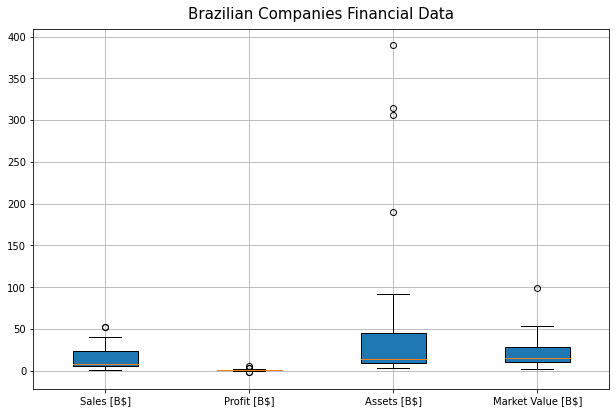

In [ ]:
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(dados_2.drop(['Rank','Name','Country'], axis=1).values, patch_artist=True)
eixo.set_title('Brazilian Companies Financial Data', fontsize=15, pad=10)
eixo.set_xticklabels(dados_2.drop(['Rank','Name','Country'], axis=1).columns)
eixo.grid(True)

####What's the biggest Brazilian company, considering Market Value?

In [ ]:
dados_2['Market Value [B$]'].sort_values(ascending=False).head()

112    99.2
158    53.3
108    48.5
679    46.1
153    40.9
Name: Market Value [B$], dtype: float64

In [ ]:
maior_valor_BR = dados_2.query("Rank == 113")
maior_valor_BR

,Rank,Name,Country,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
112,113,Vale,Brazil,40.4,5.2,92.1,99.2


####Russian companies data

In [ ]:
russia = ['Russia']
selecao = dados['Country'].isin(russia)
dados_3 = dados[selecao]
dados_3.head()

,Rank,Name,Country,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
50,51,Sberbank,Russia,47.3,10.4000,486.9,85.7
98,99,Rosneft,Russia,70.8,2.0000,207.5,77.7
308,309,Surgutneftegas,Russia,18.8,8.4000,79.4,16.7
366,367,Gazprom,Russia,90.5,-0.9212,294.9,73.5
387,388,Norilsk Nickel,Russia,15.7,3.5000,20.7,53.2


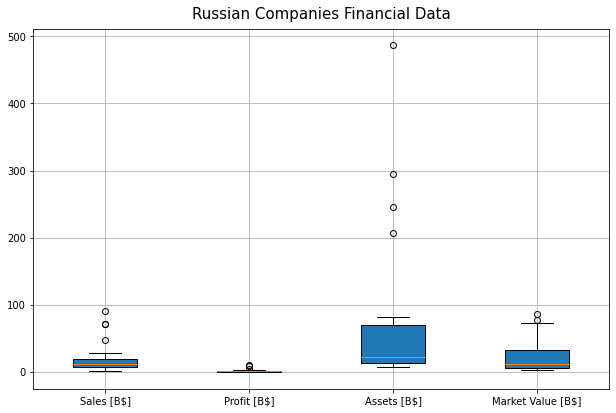

In [ ]:
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(dados_3.drop(['Rank','Name','Country'], axis=1).values, patch_artist=True)
eixo.set_title('Russian Companies Financial Data', fontsize=15, pad=10)
eixo.set_xticklabels(dados_3.drop(['Rank','Name','Country'], axis=1).columns)
eixo.grid(True)

####What's the biggest Russian company, considering Market Value?

In [ ]:
dados_3['Market Value [B$]'].sort_values(ascending=False).head()

50     85.7
98     77.7
366    73.5
529    58.4
387    53.2
Name: Market Value [B$], dtype: float64

In [ ]:
maior_valor_RS = dados_3.query("Rank == 51")
maior_valor_RS

,Rank,Name,Country,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
50,51,Sberbank,Russia,47.3,10.4,486.9,85.7


####Indian companies data

In [ ]:
india = ['India']
selecao = dados['Country'].isin(india)
dados_4 = dados[selecao]
dados_4.head()

,Rank,Name,Country,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
55,55,Reliance Industries,India,61.2,5.7,166.3,164.9
109,110,State Bank of India,India,50.6,3.1,638.1,40.8
115,116,HDFC Bank,India,20.7,4.1,233.6,105.9
181,182,ICICI Bank,India,21.3,2.0,207.9,52.7
219,220,HDFC,India,16.2,2.4,105.0,62.4


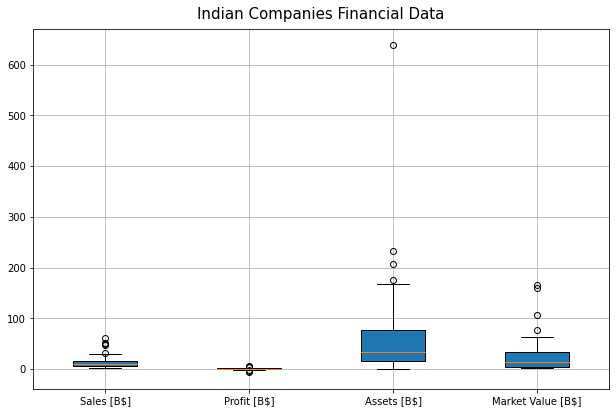

In [ ]:
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(dados_4.drop(['Rank','Name','Country'], axis=1).values, patch_artist=True)
eixo.set_title('Indian Companies Financial Data', fontsize=15, pad=10)
eixo.set_xticklabels(dados_4.drop(['Rank','Name','Country'], axis=1).columns)
eixo.grid(True)

####What's the biggest Indian company, considering Market Value?

In [ ]:
dados_4['Market Value [B$]'].sort_values(ascending=False).head()

55     164.9
321    158.9
115    105.9
491     77.5
219     62.4
Name: Market Value [B$], dtype: float64

In [ ]:
maior_valor_IN = dados_4.query("Rank == 55")
maior_valor_IN

,Rank,Name,Country,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
55,55,Reliance Industries,India,61.2,5.7,166.3,164.9


####Chinese companies data

In [ ]:
china = ['China']
selecao = dados['Country'].isin(china)
dados_5 = dados[selecao]
dados_5.head()

,Rank,Name,Country,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
0,1,ICBC,China,190.5,45.8,4914.7,249.5
3,4,China Construction Bank,China,173.5,39.3,4301.7,210.4
7,6,Ping An Insurance Group,China,169.1,20.8,1453.8,211.2
8,9,Agricultural Bank of China,China,153.9,31.3,4159.9,140.1
13,14,Bank of China,China,134.0,27.9,3731.4,116.7


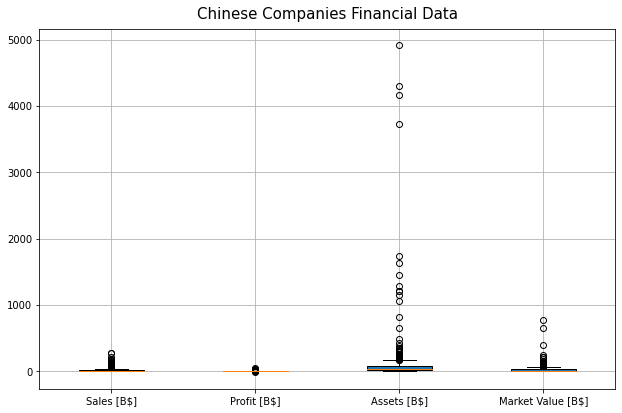

In [ ]:
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(dados_5.drop(['Rank','Name','Country'], axis=1).values, patch_artist=True)
eixo.set_title('Chinese Companies Financial Data', fontsize=15, pad=10)
eixo.set_xticklabels(dados_5.drop(['Rank','Name','Country'], axis=1).columns)
eixo.grid(True)

####What's the biggest Chinese company, considering Market Value?

In [ ]:
dados_5['Market Value [B$]'].sort_values(ascending=False).head()

28     773.8
22     657.5
263    395.8
0      249.5
455    218.6
Name: Market Value [B$], dtype: float64

In [ ]:
maior_valor_CH = dados_5.query("Rank == 29")
maior_valor_CH

,Rank,Name,Country,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
28,29,Tencent Holdings,China,70.0,23.3,203.9,773.8


####Comparing them (without China)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


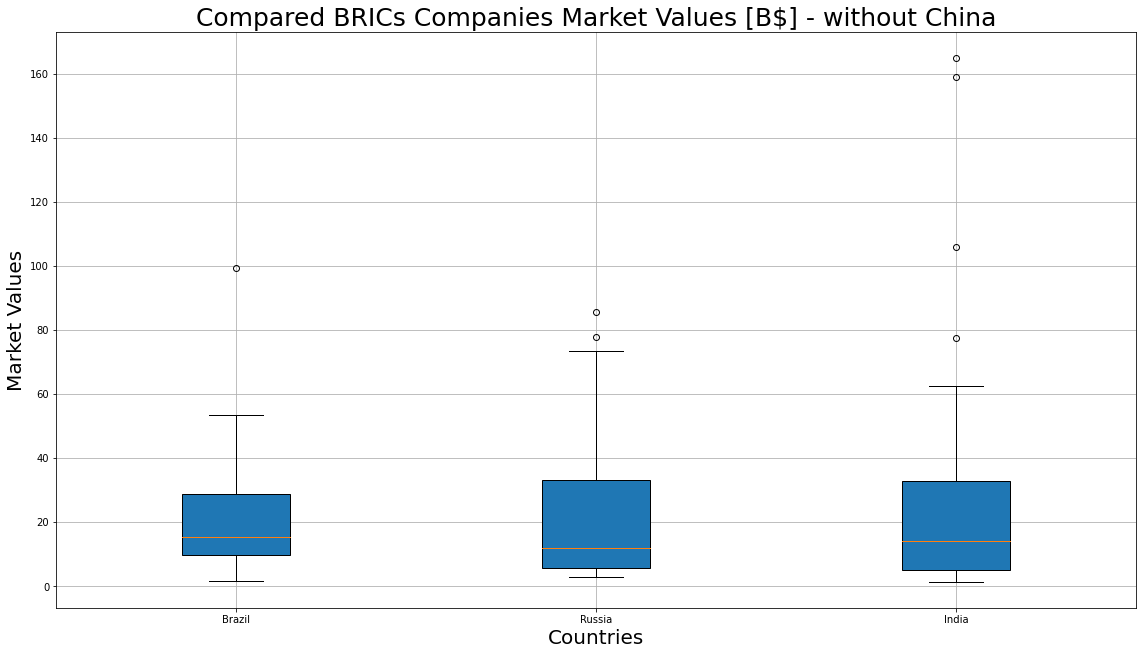

In [ ]:
fig = plt.figure(figsize=(15,8))

eixo = fig.add_axes([0, 0, 1, 1])
eixo.boxplot([dados_2['Market Value [B$]'],dados_3['Market Value [B$]'],dados_4['Market Value [B$]']],patch_artist=True)

eixo.set_title('Compared BRICs Companies Market Values [B$] - without China',fontsize=25)
eixo.set_ylabel('Market Values',fontsize=20)
eixo.set_xlabel('Countries',fontsize=20)
eixo.set_xticklabels(['Brazil','Russia','India'])
eixo.grid(True)

Conclusion: Russia and India have similar situations, while Brazil appears more timidly, with fewer and smaller companies

###<font color='blue' style='font-size: 30px;'>EUA x China companies</font>
<hr style='border: 2px solid blue;'>

####American companies data

In [ ]:
eua = ['United States']
selecao = dados['Country'].isin(eua)
dados_6 = dados[selecao]
dados_6.head()

,Rank,Name,Country,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
1,2,JPMorgan Chase,United States,136.2,40.4,3689.3,464.8
2,3,Berkshire Hathaway,United States,245.5,42.5,873.7,624.4
5,6,Apple,United States,294.0,63.9,354.1,2252.3
6,6,Bank of America,United States,98.8,17.9,2832.2,336.3
9,10,Amazon,United States,386.1,21.3,321.2,1711.8


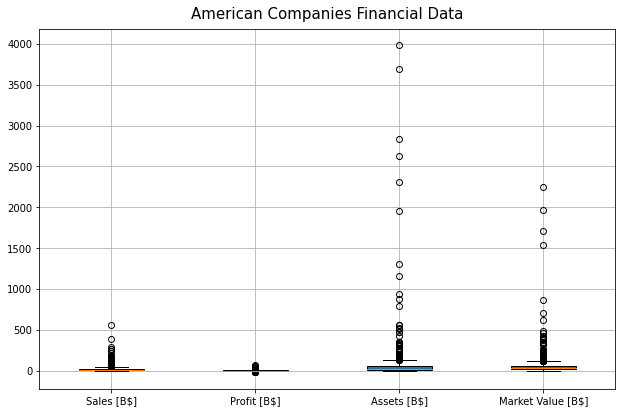

In [ ]:
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(dados_6.drop(['Rank','Name','Country'], axis=1).values, patch_artist=True)
eixo.set_title('American Companies Financial Data', fontsize=15, pad=10)
eixo.set_xticklabels(dados_6.drop(['Rank','Name','Country'], axis=1).columns)
eixo.grid(True)

####What's the biggest American company, considering Market Value?

In [ ]:
dados_6['Market Value [B$]'].sort_values(ascending=False).head()

5     2252.3
14    1966.6
9     1711.8
12    1538.9
32     870.5
Name: Market Value [B$], dtype: float64

In [ ]:
maior_valor_EUA = dados_6.query("Rank == 6")
maior_valor_EUA

,Rank,Name,Country,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
5,6,Apple,United States,294.0,63.9,354.1,2252.3
6,6,Bank of America,United States,98.8,17.9,2832.2,336.3


####Comparing EUA & China

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


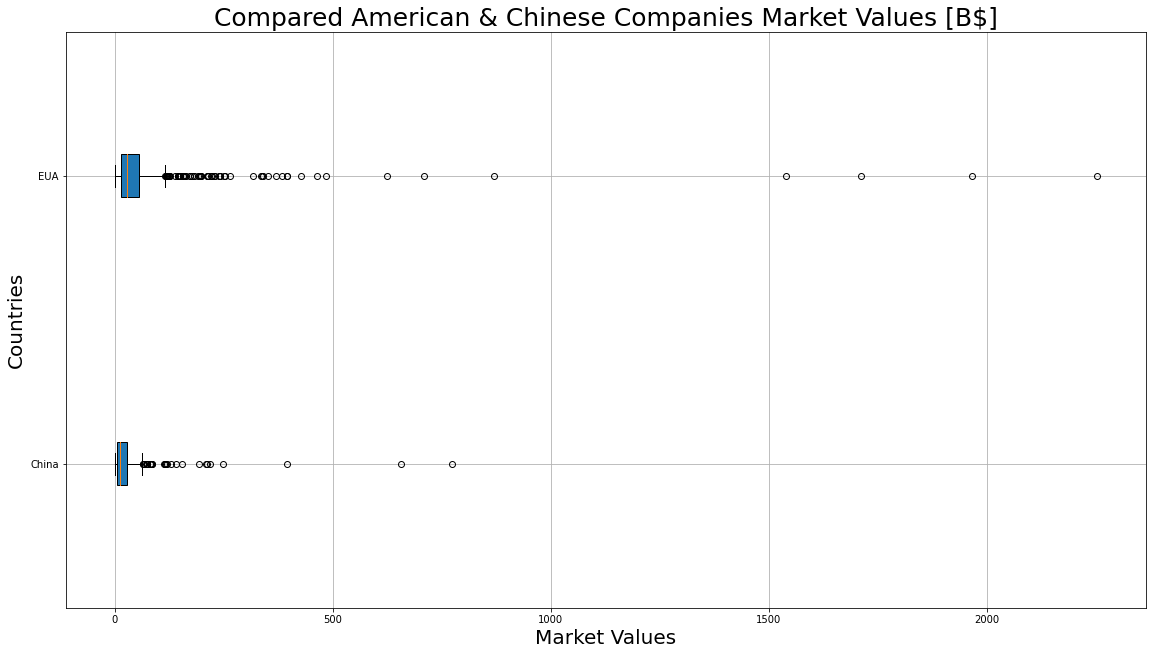

In [ ]:
fig = plt.figure(figsize=(15,8))

eixo = fig.add_axes([0, 0, 1, 1])
eixo.boxplot([dados_5['Market Value [B$]'],dados_6['Market Value [B$]']],patch_artist=True,vert=False)

eixo.set_title('Compared American & Chinese Companies Market Values [B$]',fontsize=25)
eixo.set_ylabel('Countries',fontsize=20)
eixo.set_xlabel('Market Values',fontsize=20)
eixo.set_yticklabels(['China','EUA'])
eixo.grid(True)

Conclusion: The American economy is still incomparably bigger than the Chinese one.

###<font color='blue' style='font-size: 30px;'>Ploting general financial data</font>
<hr style='border: 2px solid blue;'>

####Sales

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fortune 2000 - Companies Sales [B$]')

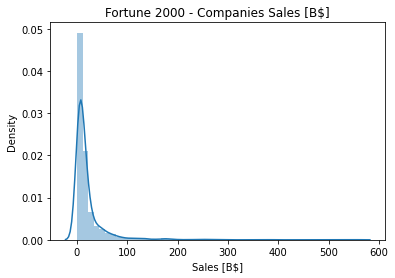

In [ ]:
ax = sns.distplot(dados['Sales [B$]'])
ax.set(xlabel="Sales [B$]", ylabel="Density")
ax.set_title("Fortune 2000 - Companies Sales [B$]")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fortune 2000 - Companies Sales [B$]')

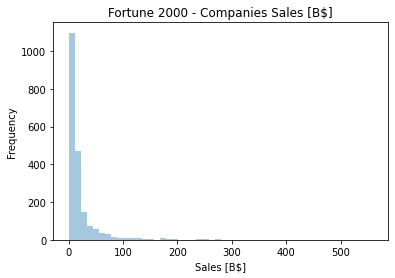

In [ ]:
ax = sns.distplot(dados['Sales [B$]'], norm_hist = False, kde = False)
ax.set(xlabel="Sales [B$]", ylabel="Frequency")
ax.set_title("Fortune 2000 - Companies Sales [B$]")

Text(0.5, 1.0, 'Fortune 2000 - Companies Sales [B$]')

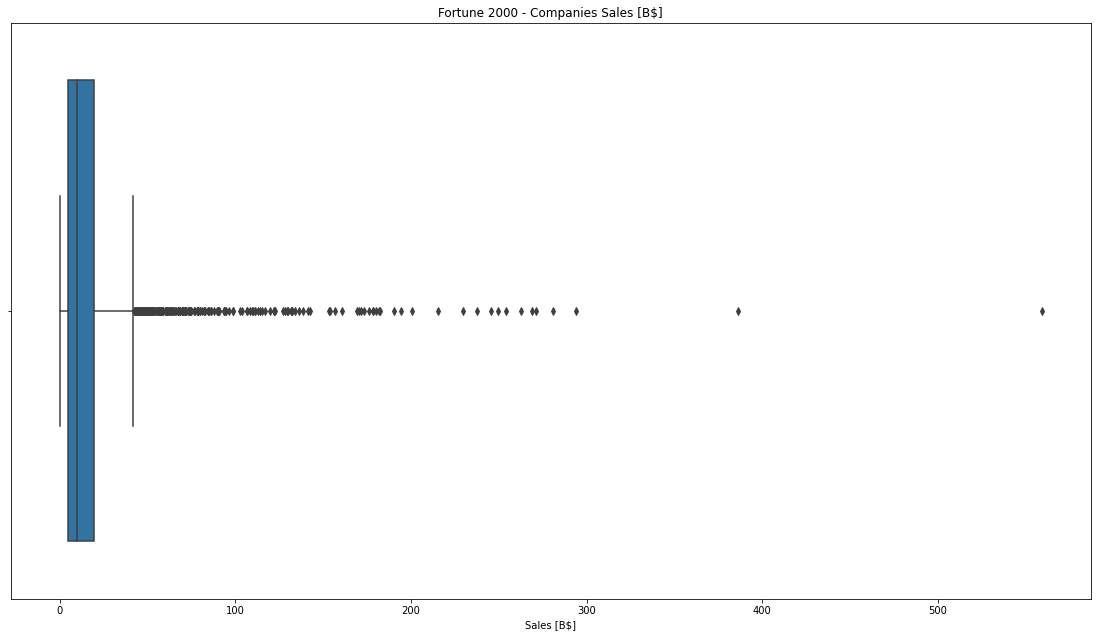

In [ ]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])

eixo = sns.boxplot(x=dados['Sales [B$]'])
eixo.set(xlabel="Sales [B$]")
eixo.set_title("Fortune 2000 - Companies Sales [B$]")

####Profit

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fortune 2000 - Companies Profits [B$]')

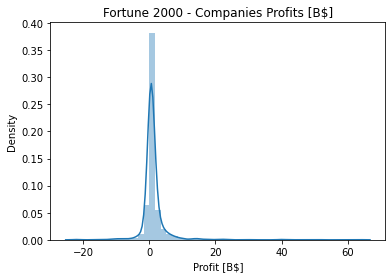

In [ ]:
ax = sns.distplot(dados['Profit [B$]'])
ax.set(xlabel="Profit [B$]", ylabel="Density")
ax.set_title("Fortune 2000 - Companies Profits [B$]")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fortune 2000 - Companies Profits [B$]')

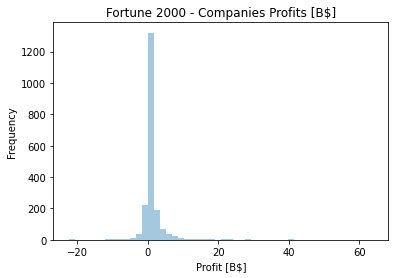

In [ ]:
ax = sns.distplot(dados['Profit [B$]'], norm_hist = False, kde = False)
ax.set(xlabel="Profit [B$]", ylabel="Frequency")
ax.set_title("Fortune 2000 - Companies Profits [B$]")

Text(0.5, 1.0, 'Fortune 2000 - Companies Profits [B$]')

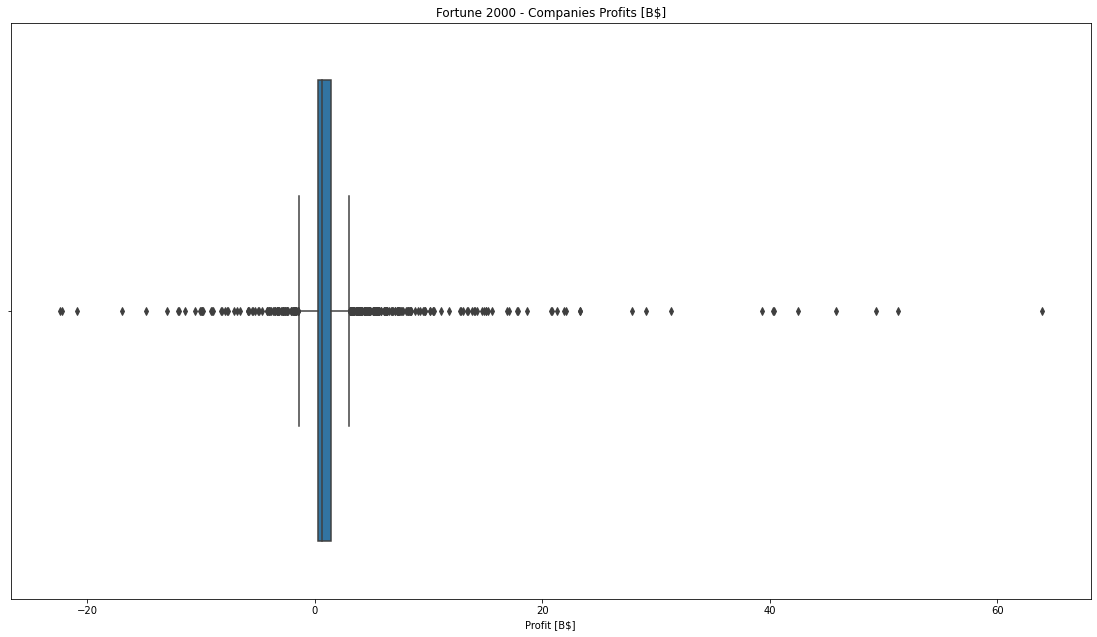

In [ ]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])

ax = sns.boxplot(x=dados['Profit [B$]'])
ax.set(xlabel="Profit [B$]")
ax.set_title("Fortune 2000 - Companies Profits [B$]")

####Assets

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fortune 2000 - Companies Assets [B$]')

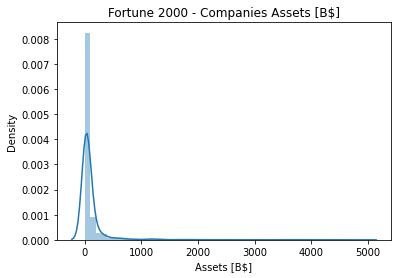

In [ ]:
ax = sns.distplot(dados['Assets [B$]'])
ax.set(xlabel="Assets [B$]", ylabel="Density")
ax.set_title("Fortune 2000 - Companies Assets [B$]")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fortune 2000 - Companies Assets [B$]')

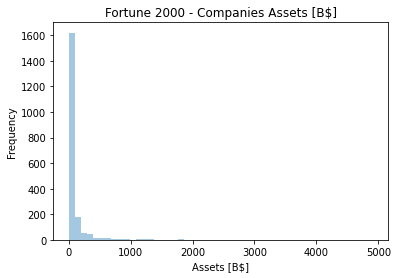

In [ ]:
ax = sns.distplot(dados['Assets [B$]'], norm_hist = False, kde = False)
ax.set(xlabel="Assets [B$]", ylabel="Frequency")
ax.set_title("Fortune 2000 - Companies Assets [B$]")

Text(0.5, 1.0, 'Fortune 2000 - Companies Assets [B$]')

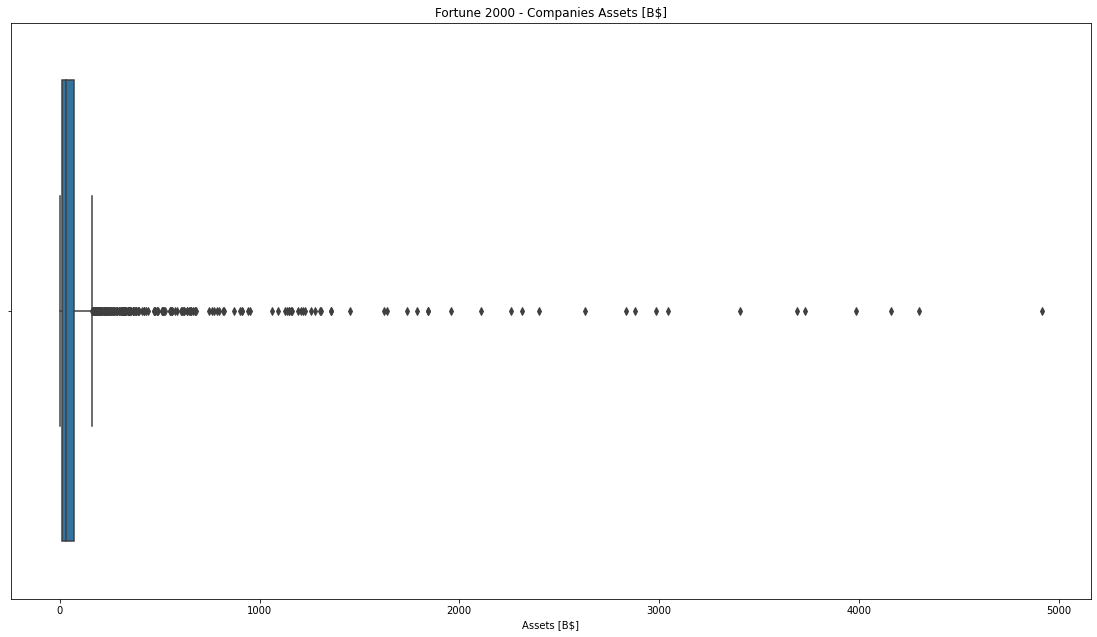

In [ ]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])

ax = sns.boxplot(x=dados['Assets [B$]'])
ax.set(xlabel="Assets [B$]")
ax.set_title("Fortune 2000 - Companies Assets [B$]")

####Market Value

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fortune 2000 - Companies Market Value [B$]')

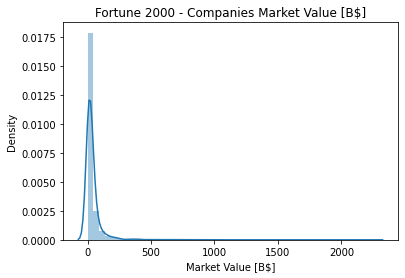

In [ ]:
ax = sns.distplot(dados['Market Value [B$]'])
ax.set(xlabel="Market Value [B$]", ylabel="Density")
ax.set_title("Fortune 2000 - Companies Market Value [B$]")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fortune 2000 - Companies Market Value [B$]')

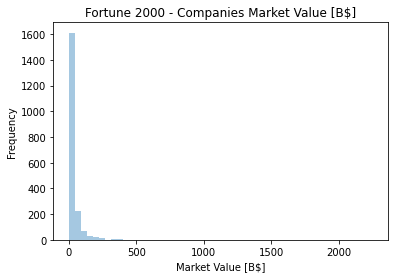

In [ ]:
ax = sns.distplot(dados['Market Value [B$]'], norm_hist = False, kde = False)
ax.set(xlabel="Market Value [B$]", ylabel="Frequency")
ax.set_title("Fortune 2000 - Companies Market Value [B$]")

Text(0.5, 1.0, 'Fortune 2000 - Companies Market Value [B$]')

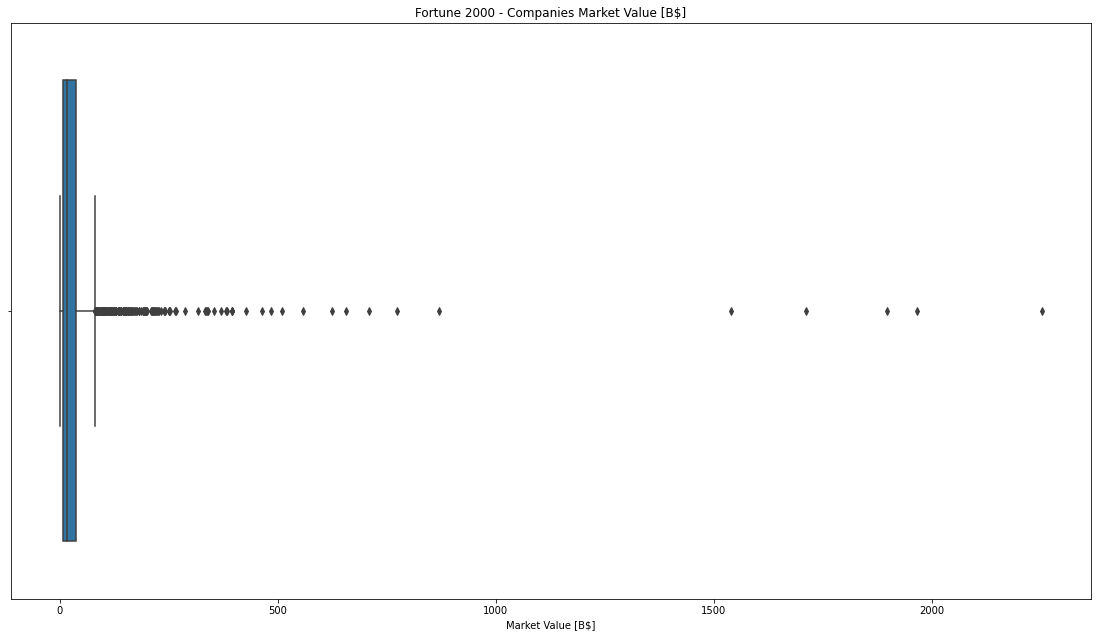

In [ ]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])

ax = sns.boxplot(x=dados['Market Value [B$]'])
ax.set(xlabel="Market Value [B$]")
ax.set_title("Fortune 2000 - Companies Market Value [B$]")

##<font color='blue' style='font-size: 30px;'>Isolating companies with a market value of less than 75 billion</font>
<hr style='border: 2px solid blue;'>

####What's the biggest Chinese company, considering Market Value?

In [ ]:
dados_5['Market Value [B$]'].sort_values(ascending=False).head()

28     773.8
22     657.5
263    395.8
0      249.5
455    218.6
Name: Market Value [B$], dtype: float64

In [ ]:
maior_valor_CH = dados_5.query("Rank == 29")
maior_valor_CH

,Rank,Name,Country,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
28,29,Tencent Holdings,China,70.0,23.3,203.9,773.8


####As the group of 2 thousand companies is very heterogeneous, I decided to isolate a minor group in the ranking.

In [ ]:
until_75 = dados.query("`Market Value [B$]` < 75")
until_75.describe()

,Rank,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
count,1792.000000,1792.000000,1792.000000,1791.000000,1792.000000
mean,1085.462054,14.956954,0.649663,85.198616,20.179037
std,539.188151,21.343740,1.826986,242.278356,16.764288
min,49.000000,0.002000,-14.800000,0.330000,0.034000
25%,635.000000,4.100000,0.247550,12.300000,7.500000
50%,1098.000000,8.900000,0.569600,26.700000,15.200000
75%,1551.250000,16.400000,1.100000,63.750000,28.625000
max,1999.000000,280.700000,21.900000,3986.100000,74.900000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fortune 2000 - Companies Market Value [B$] - < 75 B$')

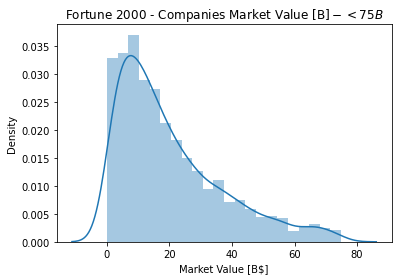

In [ ]:
ax = sns.distplot(until_75['Market Value [B$]'])
ax.set(xlabel="Market Value [B$]", ylabel="Density")
ax.set_title("Fortune 2000 - Companies Market Value [B$] - < 75 B$")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fortune 2000 - Companies Market Value [B$] - < 75 B$')

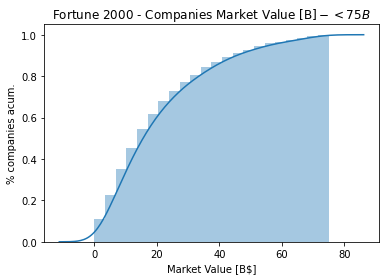

In [ ]:
ax = sns.distplot(until_75['Market Value [B$]'],
                          hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True})
ax.set(xlabel="Market Value [B$]", ylabel="% companies acum.")
ax.set_title("Fortune 2000 - Companies Market Value [B$] - < 75 B$")

Text(0.5, 1.0, 'Fortune 2000 - Companies Market Value [B$] - < 75 B$')

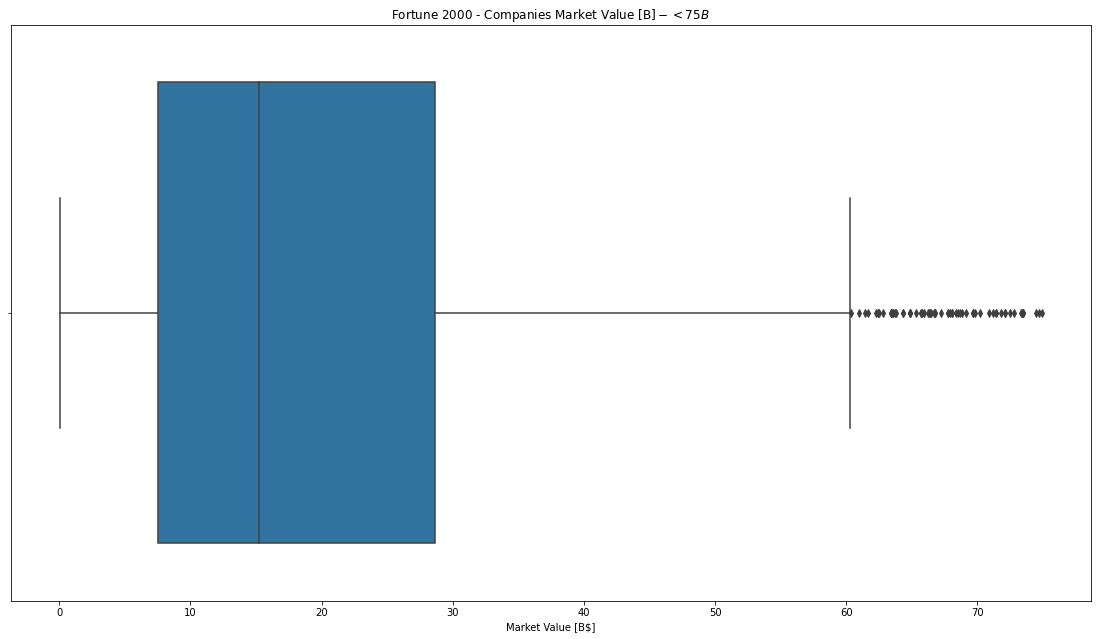

In [ ]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])

ax = sns.boxplot(x=until_75['Market Value [B$]'])
ax.set(xlabel="Market Value [B$]")
ax.set_title("Fortune 2000 - Companies Market Value [B$] - < 75 B$")

##<font color='blue' style='font-size: 30px;'>Statistical treatment</font>
<hr style='border: 2px solid blue;'>

###Average Market Value of the database

In [ ]:
dados.describe()

,Rank,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
count,2000.0000,2000.000000,2000.000000,1999.000000,2000.000000
mean,1000.3135,19.881080,1.268095,111.759040,39.854917
std,577.4019,34.400376,4.313861,346.286758,111.703725
min,1.0000,0.002000,-22.400000,0.330000,0.034000
25%,500.7500,4.500000,0.278575,13.200000,8.100000
50%,1000.0000,9.800000,0.627000,30.200000,17.700000
75%,1500.2500,19.600000,1.400000,73.350000,36.800000
max,1999.0000,559.200000,63.900000,4914.700000,2252.300000


In [ ]:
general_mean = 39.854917

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'All Companies Market Values [B$]')

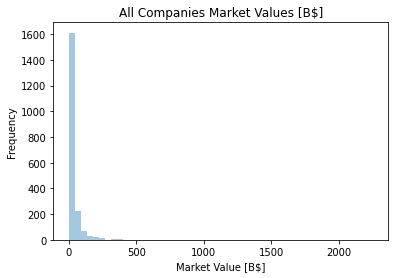

In [ ]:
ax = sns.distplot(dados['Market Value [B$]'], norm_hist = False, kde = False)
ax.set(xlabel="Market Value [B$]", ylabel="Frequency")
ax.set_title("All Companies Market Values [B$]")

Clearly, it's not a normal curve. Let´s try another variable.

###Average Profit of the database

In [ ]:
dados.describe()

,Rank,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
count,2000.0000,2000.000000,2000.000000,1999.000000,2000.000000
mean,1000.3135,19.881080,1.268095,111.759040,39.854917
std,577.4019,34.400376,4.313861,346.286758,111.703725
min,1.0000,0.002000,-22.400000,0.330000,0.034000
25%,500.7500,4.500000,0.278575,13.200000,8.100000
50%,1000.0000,9.800000,0.627000,30.200000,17.700000
75%,1500.2500,19.600000,1.400000,73.350000,36.800000
max,1999.0000,559.200000,63.900000,4914.700000,2252.300000


In [ ]:
general_mean = 1.268095

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'All Companies Profit [B$]]')

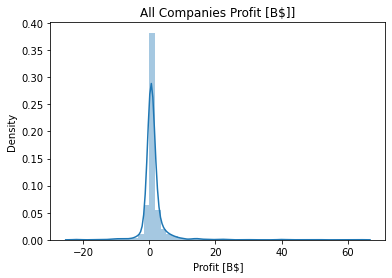

In [ ]:
ax = sns.distplot(dados['Profit [B$]'], norm_hist = False)
ax.set(xlabel="Profit [B$]", ylabel="Density")
ax.set_title("All Companies Profit [B$]]")

It seems to be a normal curve. But is it?

I have a p value of 0.0002298765436035525 - that is, less than 0.05. As this function tests the null hypothesis that the dataset comes from a normal distribution, a result less than 0.05 indicates that we are not working with a normal distribution.

Text(0.5, 1.0, 'All Companies Profit [B$]]')

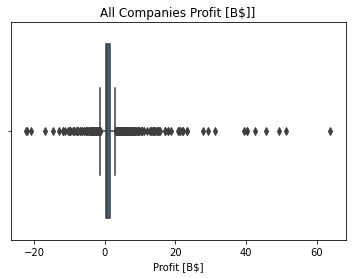

In [ ]:
ax = sns.boxplot(x=dados['Profit [B$]'])
ax.set(xlabel="Profit [B$]")
ax.set_title("All Companies Profit [B$]]")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'All Companies Profit [B$]]')

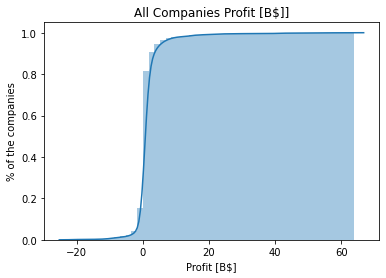

In [ ]:
ax = sns.distplot(dados['Profit [B$]'],
                 hist_kws={'cumulative': True},
                 kde_kws={'cumulative': True}
                 )
ax.set(xlabel="Profit [B$]", ylabel="% of the companies")
ax.set_title("All Companies Profit [B$]]")

This cumulative graph shows how the vast majority of companies have a profit of around 1 billion!

In [ ]:
dados['Profit [B$]'].mean() #this is the all companies profit mean

1.2680947499999962

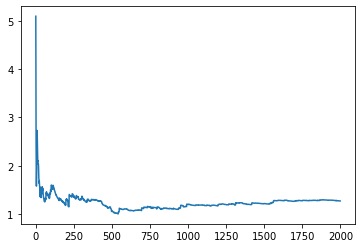

In [ ]:
#it's possible to check the randomly mean formation 

np.random.seed()
temp = dados['Profit [B$]'].sample(frac=1)

medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.plot(medias)

This test aims to demonstrate that we cannot be sure that the general mean of the data set adequately represents the real world!

And is it possible to extrapolate the data from this set of profits to all big companies in the world?

###Let's try to understand, then, what confidence interval we have for the average profit  companies.

I want to create a generalization, from this sample, about the profits that exist in the big corporations world.

The objective is to use the Z Test to find a confidence interval that will cover not only the profits in our sample, but also those outside it.

The alpha parameter, which is the value of p, is already pre-set to 0.05 (5%).

In [ ]:
from statsmodels.stats.weightstats import zconfint

zconfint(dados['Profit [B$]'])

(1.079034933510803, 1.4571545664891965)

That is, believing that our data set is a large enough sample for the application of this type of test (which requires normality and a large amount of data), we will have a confidence interval between 1.07903 and 1.45715 B$ for large companies profits in general, and not only for the sample.

Since the sample is not that big (assumption), I want to do the T test as well.

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW

descr_companies = DescrStatsW(dados['Profit [B$]'])
descr_companies

In [ ]:
descr_companies.tconfint_mean()

(1.078920392445678, 1.4572691075543223)

The range generated is very close to that generated by the Z test.

This interval would comprise the average of all the profits of large corporations in the world, assuming they have similar characteristics to the Fortune 2000 set.

###Validating an aleatory sample

####Let's choose 1 company from 1 country (the real interest is in the country)

In [ ]:
dados.query("index == 500")

,Rank,Name,Country,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
500,501,Swedbank,Sweden,6.4,1.4,315.9,21.1


In [ ]:
m_values = dados.query("Country == 'Sweden'") #ranking 1000 company country
m_values.head()

,Rank,Name,Country,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
214,215,Volvo Group,Sweden,36.8,2.1,62.2,52.2
260,261,Investor AB,Sweden,9.6,5.7,69.5,66.3
292,293,Ericsson,Sweden,25.2,1.9,33.1,46.9
399,400,SEB AB,Sweden,7.0,1.7,370.2,27.7
452,453,Svenska Handelsbanken,Sweden,6.5,1.7,381.8,22.8


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sample Companies Profit [B$]')

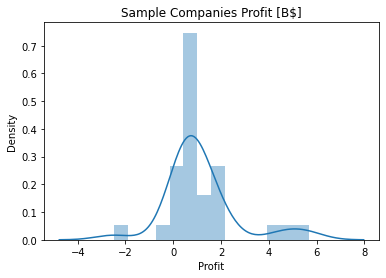

In [ ]:
ax = sns.distplot(m_values['Profit [B$]'])
ax.set(xlabel="Profit", ylabel="Density")
ax.set_title("Sample Companies Profit [B$]")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sample Companies Profit [B$]')

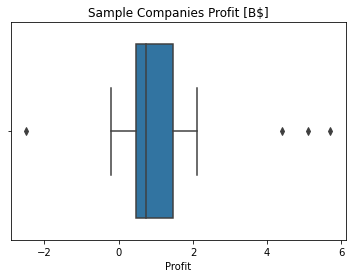

In [ ]:
ax = sns.boxplot(m_values['Profit [B$]'])
ax.set(xlabel="Profit")
ax.set_title("Sample Companies Profit [B$]")

In [ ]:
#let's remember the dataset profit mean = 1.268095 B$

m_values['Profit [B$]'].mean() #this is the sample companies profit mean

1.1359812500000002

In [ ]:
m_values['Profit [B$]'].count() #and it has statistical accuracy...

32

Indeed, the average of random data (1.13 B) is lower than the overall average of earnings, which was 1.26 B. But is this difference real? Or is it the result of chance?

To have a more objective analysis of this average, since we have more than 30 records in our set, I can apply the Z Test:

In [ ]:
from scipy.stats import normaltest

stat, p = normaltest(m_values['Profit [B$]'])
p

0.0002298765436035525

I have a p value of 0.0002298765436035525 - that is, less than 0.05. As this function tests the null hypothesis that the dataset comes from a normal distribution, a result less than 0.05 indicates that we are not working with a normal distribution.

In [ ]:
zconfint(m_values['Profit [B$]'])

(0.6112616381062875, 1.6607008618937122)

Another test can also be carried out with the random average generated, trying to affirm that the average profit of Swedish companies is close to the average profit found for companies in general. 

For this, I will import **ztest** from the Statsmodels module. 

This test will return a **pvalue** that will tell us whether, in the real world, the average of this profit would or would not equal 1.26809 (the average Fortune 2000 profit).

In [ ]:
ztest(m_values['Profit [B$]'], value = 1.2680947499999962)

(-0.49347822342111286, 0.6216747230660853)

**ztest()** returns two variables: the statistical value and the **pvalue**. 

Note that the latter is greater than 0.05 (alpha). 

Therefore, one can consider the hypothesis that, in the real world, the average profit of Swedish companies is within range 1.07892, 1.45726 (also called the null hypothesis).

####Is the small sample size a problem?

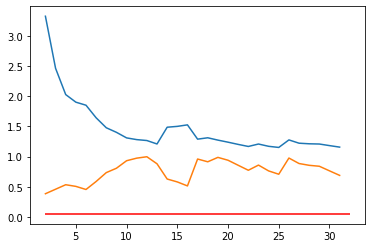

In [ ]:
np.random.seed()
temp = m_values['Profit [B$]'].sample(frac=1)

def calcula_teste(i):
  media = temp[0:i].mean()
  stat, p = ztest(temp[0:i], value = 1.2680947499999962)
  return (i,media, p)

valores = np.array([calcula_teste(i) for i in range(2, len(temp))])

plt.plot(valores[:,0], valores[:,1])
plt.plot(valores[:,0], valores[:,2])
plt.hlines(y = 0.05, xmin = 2, xmax = len(temp), colors='r')

the pvalue is always greater than 0.05!

###Comparison of two sets of samples

In [ ]:
zconfint(m_values['Profit [B$]'], dados['Profit [B$]'])

(-1.6285528042096973, 1.3643258042096977)

The result means that the profit average of the sample is between -1.62855 and 1.36432, smaller than Fortune 2000

In [ ]:
from scipy.stats import ttest_ind

print(ttest_ind(dados['Profit [B$]'], m_values['Profit [B$]']))

Ttest_indResult(statistic=0.17303588668321077, pvalue=0.8626404701549178)


Another time, pvalue is greater than 0.05, even using T test.

In [ ]:
descr_todos_os_lucros = DescrStatsW(dados['Profit [B$]'])
descr_swedish = DescrStatsW(m_values['Profit [B$]'])
comparacao = descr_todos_os_lucros.get_compare(descr_swedish)

comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.1321,0.764,0.173,0.863,-1.365,1.629


In [ ]:
descr_todos_os_lucros = DescrStatsW(dados['Profit [B$]'])
descr_swedish = DescrStatsW(m_values['Profit [B$]'])
comparacao = descr_todos_os_lucros.get_compare(descr_swedish)

comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.1321,0.764,0.173,0.863,-1.365,1.629


Another time, pvalue is greater than 0.05, even using Scipy. 

That is, the sets are the same.

###Visualizing through graphics

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Profit data comparison')

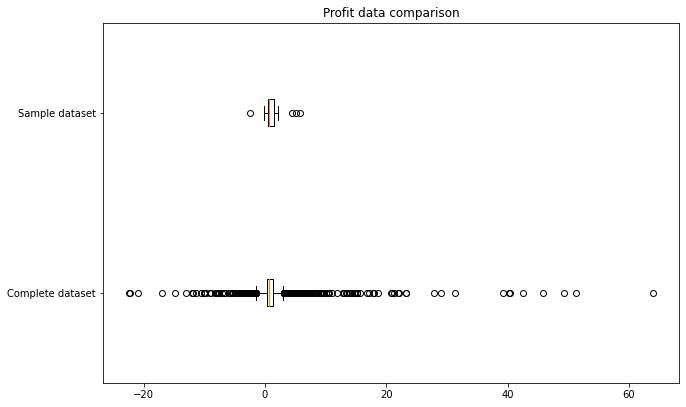

In [ ]:
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0,0,1,1])

plt.boxplot([dados['Profit [B$]'], m_values['Profit [B$]']], labels=["Complete dataset", "Sample dataset"],vert=False)
plt.title("Profit data comparison")

With the exception of the outliers, the boxplot drawings are really similar!

###What if I choose and analyze one more set of data?

In [ ]:
dados.query("index == 350")

,Rank,Name,Country,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
350,351,BP,United Kingdom,180.0,-20.9,267.7,84.5


In [ ]:
m_values_2 = dados.query("Country == 'United Kingdom'") #ranking 1000 company country
m_values_2.head()

,Rank,Name,Country,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
39,40,HSBC Holdings,United Kingdom,60.6,4.0,2984.2,120.3
90,90,Unilever,United Kingdom,57.8,6.3,82.8,151.1
96,97,GlaxoSmithKline,United Kingdom,43.7,7.4,109.9,92.9
104,105,Prudential,United Kingdom,54.8,2.1,469.5,55.7
119,120,Vodafone,United Kingdom,49.7,2.8,183.9,52.6


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sample Companies Profit [B$]')

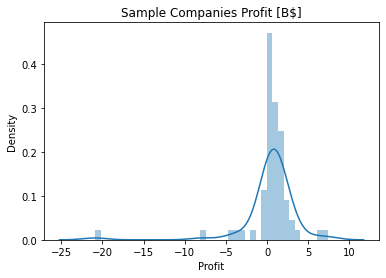

In [ ]:
ax = sns.distplot(m_values_2['Profit [B$]'])
ax.set(xlabel="Profit", ylabel="Density")
ax.set_title("Sample Companies Profit [B$]")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sample Companies Profit [B$]')

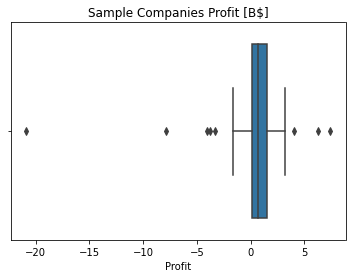

In [ ]:
ax = sns.boxplot(m_values_2['Profit [B$]'])
ax.set(xlabel="Profit")
ax.set_title("Sample Companies Profit [B$]")

In [ ]:
from scipy.stats import normaltest

stat, p = normaltest(m_values_2['Profit [B$]'])
p

1.0292407999178523e-20

I have a p value of 1.0292407999178523e-20 - that is, less than 0.05. As this function tests the null hypothesis that the dataset comes from a normal distribution, a result less than 0.05 indicates that we are not working with a normal distribution.

In [ ]:
m_values_2.describe()

,Rank,Sales [B$],Profit [B$],Assets [B$],Market Value [B$]
count,66.000000,66.000000,66.000000,66.000000,66.000000
mean,885.363636,21.383500,0.419759,206.275758,31.574242
std,581.880100,25.883212,3.350739,487.306192,35.143667
min,40.000000,0.157000,-20.900000,6.300000,1.600000
25%,336.750000,7.675000,0.125425,16.625000,10.350000
50%,849.000000,14.600000,0.719750,37.750000,18.100000
75%,1334.500000,26.900000,1.500000,91.125000,40.850000
max,1989.000000,180.000000,7.400000,2984.200000,151.600000


In [ ]:
#let's remember the dataset profit mean = 1.268095 B$

m_values_2['Profit [B$]'].mean() #this is the sample companies profit mean

0.41975909090909086

In [ ]:
m_values_2['Profit [B$]'].count() #and it has statistical accuracy...

66

####Boxplot comparison between Swedish and British Profit Companies

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Swedish and British Profit Companies Comparation')

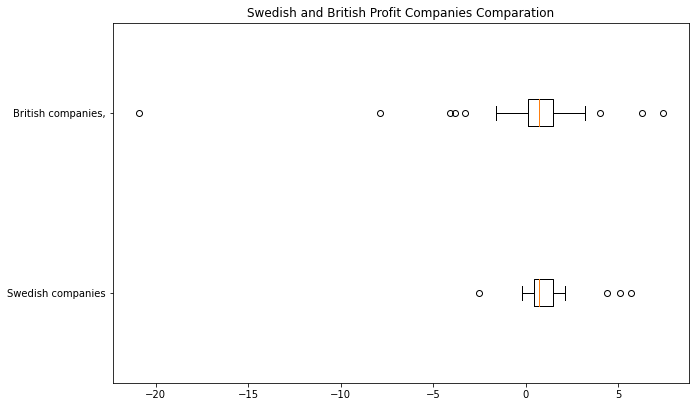

In [ ]:
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0,0,1,1])

plt.boxplot([m_values['Profit [B$]'], m_values_2['Profit [B$]']], labels=["Swedish companies", "British companies,"], vert=False)
plt.title("Swedish and British Profit Companies Comparation")

In [ ]:
descr_SW = DescrStatsW(m_values['Profit [B$]'])
descr_UK = DescrStatsW(m_values_2['Profit [B$]'])
comparacao = descr_SW.get_compare(descr_UK)

comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.7162,0.622,1.151,0.253,-0.519,1.951


Applying the **Z Test** with **alpha** = 0.05, I haven't found a statistical difference between the Swedish and the British companies profits, with a **p value** equal to 0.253 and a confidence interval between -0.519 and 1.951

In [ ]:
from scipy.stats import ranksums

_, p = ranksums(m_values['Profit [B$]'], m_values_2['Profit [B$]'])
p

0.4419292899255963

In ranksums(), the null hypothesis is that the two samples came from the same distribution.

Considering pvalue greater than 0.05, I can't rule out the null hypothesis!!!

##<font color='blue' style='font-size: 30px;'>Conclusions</font>
<hr style='border: 2px solid blue;'>

*   I am very impressed how a database with so few variables can bring so much wealth of information.
*   I got to know a little more about Brazilian, Russian, Indian, Swedish and British companies.
*   I observed whether or not the financial variables produced normal curves, and I performed statistical tests to evaluate samples that could be explained by the overall result.
*   I still have a lot to learn in the statistical dealings of data, and with my effort and dedication, it's just a matter of time!